# Dealing with bigger unstructured data

- So far, a lot of the data we dealt with is collected using a designed experiment. <br> <br>
- Unless you are optimizing data obtained by a simulation, this will not be the case. <br><br>
- Examples: <br><br>
    - *Existing sensors built in to collect data from process units as it is operated.* <br><br>
    - *Web data from users of social media.* <br><br>
    - *Video data from a street camera.* <br> <br>
    - ... <br> <br>

## Big - Data

The term **Big Data** is very highly associated with Machine Learning. <br><br>

What is considered **Big-Data**??? <br><br>
- Means different things to different scientific fields. <br><br>
- For a Computer Scientist: terabytes of data and millions of dimensions. <br><br>
- For a Chemical Engineer: an excel sheet with a few thousands of measurements <br> and few tens/hundreds of dimensions. <br><br>
- What makes it a *"Big-Data"* problem is that the data is far too complex <br> to handle with whatever is very stadard technique. <br><br>
- Not all problems we deal with has to do with "Big-Data", they have to do with just "Data" <br><br>
- *Big-Data* may have all or any of 4V's: <br><br>
  - **Volume**: a lot of data <br><br>
  - **Variety**: different forms of data <br><br>
  - **Velocity**: data generated at high rates <br><br>
  - **Veracity**: noisy or incomplete data <br> 
<br> 

https://en.wikipedia.org/wiki/Big_data#/media/File:Big_Data.png

A lot of what we'll talk about in this lecture, is applicable to **"small"** or **"medium"** data, or just DATA. <br> <br>


## Challenges

### 1. Volume

#### 1.1. (True) Dimensionality

- What is considered "high-dimensional"? <br><br>
  - It really depends! <br><br>
  - For data-driven optimization algorithms, current state-of-the-art considers more than ~20 variables high-dimensional! <br><br>
  - **Typically, the higher the dimensionality, the more likely that <br> not ALL dimensions are important, or not all dimensions are completely independent.** <br><br>
  - This means that there are opportunities to use the data <br> to identify **true dimensionality**. **Then we optimize in reduced space.** <br><br>

#### 1.2. Number of samples
- The amount of data should always be assessed with respect to the dimensionality of problem. <br> <br>
- Assume the data matrix ($A$) is of size $[N \times d]$. $N$ = number of samples, $d$ number of dimensions. <br> <br>
- **If $N>>d$:** <br><br>
  - **Pro:** We can say we have enough data to learn the map between inputs and outputs. <br> <br>
    **Note: Is this always the case???**: <br> <br>
  - **Challenge:** If we use interpolating functions (i.e., Gaussian Process Models), it would take <br> a lot of time to train, and resulting function would be huge (impossible to optimize). <br> <br>
- **If $N<<d$:** <br><br>
  - We don't have enough information to safely say we can really learn the map between inputs - outputs. <br><br>
  - There are still some tests you can do, but be very careful with conclusions! <br> <br>
  
- In most cases in process engineering applications, we have more data than dimensions $N>d$, which can help us make at least some preliminary analysis. <br> <br>


### 2. Veracity

#### 2.1. Noise and Outliers

- **Real, process data is never noise-free. Why?** <br><br>
  - Human Errors, bias, <br><br>
  - Sensor calibration, accuracy, malfunction, <br> <br>
  - Environmental factors (i.e., climate affecting experiment outcome). <br><br>
  
- **Depending on severity of noise or outliers in data, this can cause detremental effects in learning.** <br><br>
  - If little noise and enough data: regression and regularization might be enough to filter it out. <br> <br>
  - If high level of noise, and not much data and/or many significant outliers: we need "data preprocessing" before any regression and/or optimization. (More on this next week...) <br><br>
  
#### 2.2. Missing Information

- **Another big problem in industry is incomplete data.WHY???** <br><br>
  - Sensor failures <br> <br>
  - Not performed experiments due to time, cost, capabilities <br><br>
  - Removed outliers <br><br>
  - Merged data from different sources, not followed same experimental design <br><br>
  
- **Can we not even use a data set with missing information???** <br><br>
  - Depends on amount of missing information, <br><br>
  - Depends on structure of missing information (i.e., scattered randomly or in big blocks). <br><br>
  - Several methods exist that have shown to handle different amounts and structures of missing information, by **IMPUTATION** (more on this next week...) <br><br>
  
<img src="Lecture23.png" width="1000" />


## Principal Component Analysis

### Introduction
- Method used for dimensionality reduction! <br><br>
- Method used for filtering out noise and imputing missing values! <br><br>
- With respect to Machine Learning, this is an *Unsupervised* Method (i.e., we are not really predicting an output) <br><br>
- **Applications**" Data - Visualization, Process Control, Development of reduced-order models, Process Monitoring, Fault Detection, and many more. <br><br>

- **Preliminaries:**<br><br>

- Assume you have a data set of $X = [N \times d]$. <br><br>
- We are not sure if all dimensions are important.<br><br>
- We don't know if any dimensions are correlated.<br><br>
- There is noise in the data.<br><br>

### Motivating Example: <br><br>

<img src="Lecture23_2.png" width="1000" />

- In this example, what is the dimensionality of our data set? <br><br>
  - If we knew the phenomenon before we designed the experiment, we would have only placed one camera to measure the ball movement along one axis, axis x. <br><br>
- What is the noise in this data set? <br> <br>
  - imperfect cameras, low resolution <br><br>
  - air and friction effects <br><br>
  
- This might seem like a silly problem, but this is really the problem that scientists and engineers face every day. <br><br>
- The same way the data we collected here is redundant and correlated in space, this can happen with other measurments (i.e., temperature, pressure, biomarkers, and many more). <br><br>

### Methodology

**What does PCA do?** <br><br>

**What are Principal Components??** <br><br>

#### A. Change of basis:

- The goal of PCA is to re-express the data, with respect to a meaningful basis, or dimension. <br><br>
- This new basis/dimension is a linear combination of the measured dimensions. <br><br>
- This new basis/dimension is called a Principal Component. <br><br>

**Let's go back to the motivating example.** <br><br>

- Based on the camera speed we have, assume we observed 72000 samples. $N = 72000$ <br><br>

- What is the original dimensionality of the data-set we collected??? What is n???<br>
  - **Answer**: 6: xa,ya,xb,yb,xc,yc <br><br>
- What do you think the true dimensionality of the problem is???? <br><br>
  - **Answer**: 1: x <br><br>
  
#### B. Signal to noise ratio:

<img src="Lecture23_3.png" width="1000" />

<img src="Lecture23_7.png" width="1000" />


#### C. Mathematical Concept/Steps of PCA: 

<img src="Lecture23_4.png" width="1000" />

<img src="Lecture23_5.png" width="1000" />

<img src="Lecture23_8.png" width="1000" />


#### D. Handling Noise:


<img src="Lecture23_6.png" width="1000" />



Automatically created module for IPython interactive environment


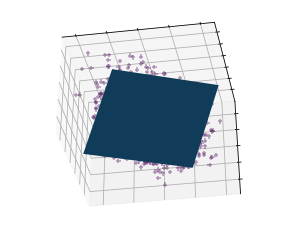

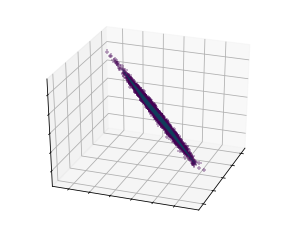

In [2]:
#Code example on how to use Pricipal Component Analysis using scikit-learn:

# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

#import packages/modules:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# #############################################################################
# Create the data: this is a different example, where a 3-d data set is created using 
# random number generators. The data set is generated to have most variability in 1 dimension, instead of 3.
#you don't need to worry about how data was generated!

e = np.exp(1)
np.random.seed(4)

def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm
# End of data generation!
# #############################################################################


# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()